<a href="https://colab.research.google.com/github/Harshavardhan88/ELEVATE-LABS_TASK-3/blob/main/TASK-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 2. Load Dataset

In [72]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# 3. Preprocess Dataset

In [73]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [74]:
print(df.isnull().sum())
df = df.dropna()
if 'furnishingstatus' in df.columns:
    df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# 4. Simple Linear Regression

**Select features and target**

In [75]:
X_simple = df[['area']]
y = df['price']

**Split into train-test**

In [76]:
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)


**Train modelel**

In [77]:
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)


LinearRegression()

**Predict**

In [78]:
y_pred_simple = model_simple.predict(X_test_simple)


# 5. Evaluation (Simple Regression)

In [79]:
print("Simple Linear Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_simple))
print("MSE:", mean_squared_error(y_test, y_pred_simple))
print("R² Score:", r2_score(y_test, y_pred_simple))


Simple Linear Regression Evaluation:
MAE: 1474748.1337969352
MSE: 3675286604768.185
R² Score: 0.27287851871974644


# 6. Plot Regression Line

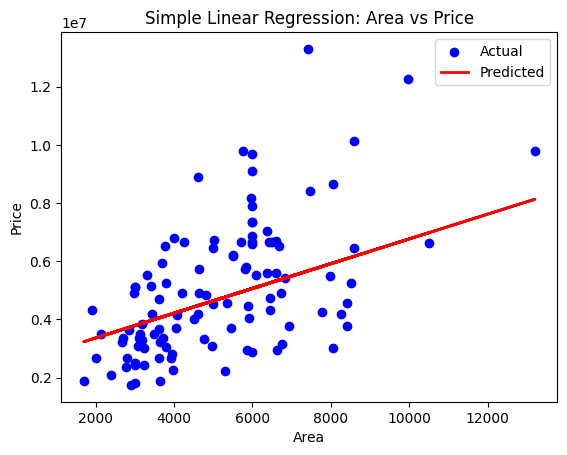

In [80]:
plt.scatter(X_test_simple, y_test, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()


# 7. Coefficients

In [81]:
print("Coefficient (Slope):", model_simple.coef_)
print("Intercept (Bias):", model_simple.intercept_)


Coefficient (Slope): [425.72984194]
Intercept (Bias): 2512254.2639593435


# 8. Plot Residuals

**Residual plots help check if errors are random (good) or have patterns (bad).**

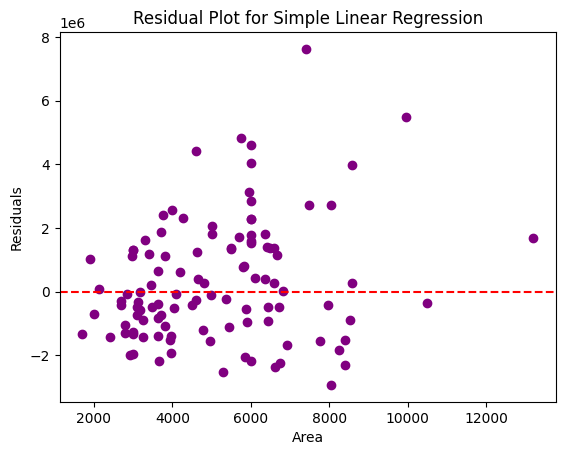

In [82]:
residuals = y_test - y_pred_simple
plt.scatter(X_test_simple, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Area')
plt.ylabel('Residuals')
plt.title('Residual Plot for Simple Linear Regression')
plt.show()


**If residuals are randomly scattered around 0, the model is good.**

# 9. Multiple Linear Regression

 **Select multiple features**

In [83]:
X_multiple = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']


 **Split into train-test**

In [84]:
X_train_multiple, X_test_multiple, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)


**Train model**

In [85]:
model_multiple = LinearRegression()
model_multiple.fit(X_train_multiple, y_train)


LinearRegression()

**Predict**

In [86]:
y_pred_multiple = model_multiple.predict(X_test_multiple)


# 10. Evaluation (Multiple Regression)

In [87]:
print("Multiple Linear Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_multiple))
print("MSE:", mean_squared_error(y_test, y_pred_multiple))
print("R² Score:", r2_score(y_test, y_pred_multiple))


Multiple Linear Regression Evaluation:
MAE: 1265275.6699454375
MSE: 2750040479309.0522
R² Score: 0.4559299118872445


# 11. Coefficients (Multiple)

In [88]:
print("Intercept (Bias):", model_multiple.intercept_)
print("\nFeature Coefficients:")
for feature, coef in zip(X_multiple.columns, model_multiple.coef_):
    print(f"{feature}: {coef}")


Intercept (Bias): 59485.379208717495

Feature Coefficients:
area: 345.4665700831111
bedrooms: 360197.6504575056
bathrooms: 1422319.657641412


# 12. Check Multicollinearity (VIF)

**Multicollinearity means two features are too similar → bad for regression.**

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = X_multiple.columns
vif_data['VIF'] = [variance_inflation_factor(X_multiple.values, i) for i in range(X_multiple.shape[1])]

print(vif_data)


     feature        VIF
0       area   6.077712
1   bedrooms  10.687621
2  bathrooms   8.662688


**If VIF > 5, possible multicollinearity
  .If VIF > 10, strong multicollinearity**

